# User activity analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CLEANING

In [3]:
path = "../data/logs.csv"

In [4]:
df = pd.read_csv(path)

C:\Users\whose\AppData\Local\Temp\ipykernel_29068\3280352130.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [5]:
df.info()
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB



,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


In [6]:
print(df['network_protocol'].unique())

['TCP  ' 'ICMP ' 'HTTP' 'UDP  ' 'HTTP  ']


what is this

In [7]:
print(df['age'].unique())

['28' '21' '20' '66' '53' '49' '32' '69' '60' '36' '29' '67' '25' '24'
 '65' '42' '46' '23' '27' '52' '44' '51' '50' '68' '43' '59' '54' '48'
 '40' '41' '19' '18' '22' '61' '45' '64' '33' '63' '34' '47' '38' '57'
 '30' '26' '62' '39' '55' '56' '35' '31' '37' '--' '58' nan]


wth is that

In [8]:
print(df['accessed_Ffom'].unique())

['Chrome' 'Mozilla Firefox' 'Android App' 'IOS App' 'Microsoft Edge'
 'Safari' 'Others' 'SafFRi']


wtf is THAT?

ok other columns is good

In [9]:
df['network_protocol'] = df['network_protocol'].str.strip()
print(df['network_protocol'].unique())

['TCP' 'ICMP' 'HTTP' 'UDP']


In [10]:
df['accessed_Ffom'] = df['accessed_Ffom'].replace('SafFRi', 'Safari')
print(df['accessed_Ffom'].unique())

['Chrome' 'Mozilla Firefox' 'Android App' 'IOS App' 'Microsoft Edge'
 'Safari' 'Others']


In [11]:
df['age'] = df['age'].replace('--', np.nan)
print(df['age'].unique())

['28' '21' '20' '66' '53' '49' '32' '69' '60' '36' '29' '67' '25' '24'
 '65' '42' '46' '23' '27' '52' '44' '51' '50' '68' '43' '59' '54' '48'
 '40' '41' '19' '18' '22' '61' '45' '64' '33' '63' '34' '47' '38' '57'
 '30' '26' '62' '39' '55' '56' '35' '31' '37' nan '58']


but nan in age column is bad so i prefer to convert the column to a categorical one

In [12]:
bins = [0, 25, 35, 45, 55, 65, 150]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

df['age'] = pd.to_numeric(df['age'], errors='coerce')

df['age_cat'] = pd.cut(df['age'], bins, labels=labels, right=True).cat.add_categories(['unknown'])
df['age_cat'] = df['age_cat'].fillna('unknown')

In [13]:
df.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method,age_cat
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28.0,Female,CA,Normal,English,261.9600,No,0.0,Credit Card,26-35
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21.0,Male,AR,Normal,English,731.9400,No,0.0,Debit Card,18-25
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20.0,Male,PL,Normal,English,14.6200,No,0.0,Cash,18-25
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66.0,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card,65+
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53.0,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash,46-55


it's end.

In [14]:
df.to_csv('../data/cleared/data.csv', index=False)
df.head(10).to_csv("../data/preview/data.csv", index=False)

# Traffic analysis

## peak hours

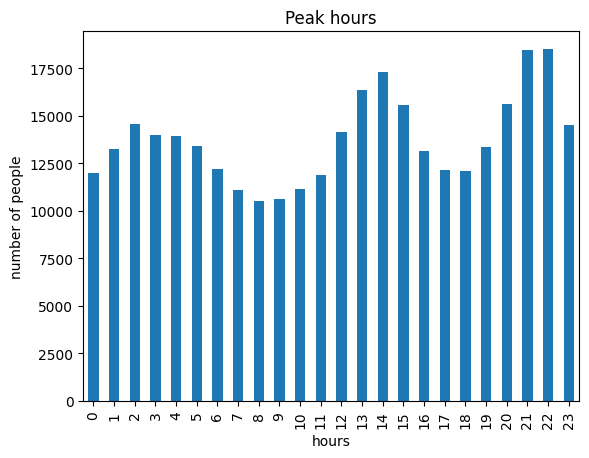

In [15]:
df['start'] = pd.to_datetime(df['accessed_date'])
df['end'] = df['start'] + pd.to_timedelta(df['duration_(secs)'], unit="s")

df['start_hour'] = df['start'].dt.floor('h')
df['end_hour'] = df['end'].dt.floor('h')

df['hours_range'] = df.apply(lambda r: pd.date_range(r.start_hour, r.end_hour, freq='h'), axis=1)

exploded = df.explode('hours_range')
peaks = exploded.groupby(exploded['hours_range'].dt.hour)['hours_range'].count()
peaks.plot(kind='bar')

plt.title("Peak hours")
plt.xlabel("hours")
plt.ylabel("number of people")

plt.savefig("../plots/peak_hours.png")
plt.show()


## duration alalysis

In [16]:
print(df['duration_(secs)'].describe())

count    172838.000000
mean       3248.031827
std        1010.872270
min        1500.000000
25%        2371.000000
50%        3246.000000
75%        4124.000000
max        5000.000000
Name: duration_(secs), dtype: float64


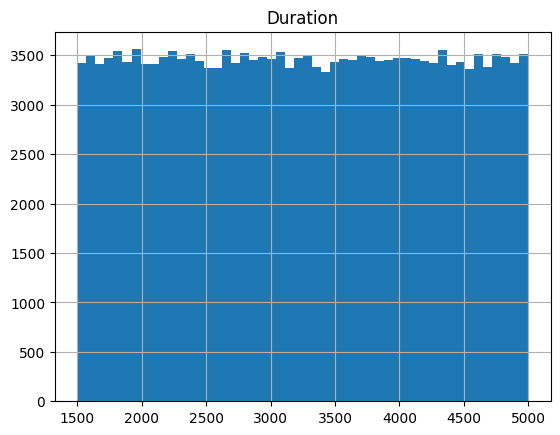

In [17]:
df['duration_(secs)'].hist(bins=50)
plt.title("Duration")
plt.savefig("../plots/duration.png")
plt.show()

## correlation bytes - duration

In [18]:
r = df['duration_(secs)'].corr(df['bytes'])
print(r)

0.0045707753662710135


there is no correlation at all

## Country activity

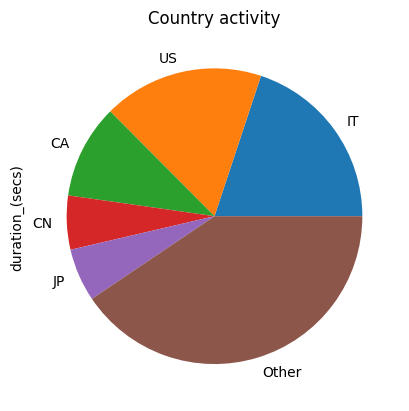

In [19]:
countries = df.groupby('country')['duration_(secs)'].sum().sort_values(ascending=False)
top5 = countries[:5]
others = countries[5:].sum()
top5['Other'] = others

top5.plot(kind='pie')
plt.title("Country activity")

plt.savefig("../plots/country_activity.png")
plt.show()

# User activity analisys

## age segment

In [20]:
print("Duration")
print(df.groupby("age_cat")['duration_(secs)'].mean())

Duration
age_cat
18-25      3257.236070
26-35      3242.425103
36-45      3248.274242
46-55      3266.336480
56-65      3254.118333
65+        3242.537498
unknown    3243.573555
Name: duration_(secs), dtype: float64


C:\Users\whose\AppData\Local\Temp\ipykernel_29068\1425598939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("age_cat")['duration_(secs)'].mean())


In [21]:
print("Sales")
print(df.groupby("age_cat")['sales'].mean())

Sales
age_cat
18-25      428.042466
26-35      422.052257
36-45      412.159561
46-55      421.773372
56-65      432.186194
65+        422.668607
unknown    400.170396
Name: sales, dtype: float64


C:\Users\whose\AppData\Local\Temp\ipykernel_29068\399324422.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("age_cat")['sales'].mean())


## gender segment

In [22]:
print("Duration")
print(df.groupby("gender")['duration_(secs)'].mean())

Duration
gender
Female     3248.200824
Male       3248.920776
Unknown    3243.504784
Name: duration_(secs), dtype: float64


In [23]:
print("Sales")
print(df.groupby("gender")['sales'].mean())

Sales
gender
Female     453.544535
Male       452.142065
Unknown      0.000000
Name: sales, dtype: float64


In [24]:
print("Bytes")
print(df.groupby("gender")['bytes'].mean())

Bytes
gender
Female     1660.155054
Male       1652.911624
Unknown     329.479919
Name: bytes, dtype: float64


## membership segment

In [25]:
print("Duration")
print(df.groupby("membership")['duration_(secs)'].mean())

Duration
membership
Normal           3249.844034
Not Logged In    3243.504784
Premium          3247.864316
Name: duration_(secs), dtype: float64


In [26]:
print("Sales")
print(df.groupby("membership")['sales'].mean())

Sales
membership
Normal           457.493123
Not Logged In      0.000000
Premium          450.896047
Name: sales, dtype: float64


In [27]:
print("Bytes")
print(df.groupby("membership")['bytes'].mean())

Bytes
membership
Normal            894.993247
Not Logged In     329.479919
Premium          2009.502399
Name: bytes, dtype: float64


# Sessions

In [28]:
df['accessed_date'] = pd.to_datetime(df['accessed_date'], errors='coerce')
session_df = df.sort_values(['ip', 'accessed_date'])
df['diff'] = df.groupby('ip')['accessed_date'].diff()
df['new'] = (df['diff'] > pd.Timedelta('30min')).astype(int)
df['session_id'] = df.groupby('ip')['new'].cumsum() + 1

In [29]:
g = df.groupby(['ip', 'session_id'])
sess = g.agg(
    start=('accessed_date', 'min'),
    end=('accessed_date', 'max'),
    dur=('duration_(secs)', 'sum'),
    events=('session_id', 'count'),
    bytes=('bytes', 'sum')
).reset_index()

## most heavy users

In [30]:
sess.sort_values('bytes', ascending=False).head()

,ip,session_id,start,end,dur,events,bytes
22106,114.121.129.165,1,2017-03-21 05:33:50.851,2017-03-21 05:33:50.851,3416,1,932858
13317,107.172.50.225,1,2017-03-16 10:46:23.265,2017-03-16 10:46:23.265,4771,1,897983
116025,67.59.219.221,1,2017-03-15 04:30:23.524,2017-03-15 04:30:23.524,3619,1,749603
64856,193.77.35.110,1,2017-03-17 16:02:16.381,2017-03-17 16:02:16.381,4815,1,704791
64801,193.41.156.5,1,2017-03-17 16:02:06.163,2017-03-17 16:02:06.163,3892,1,661664


## Users with most duration

In [31]:
sess.sort_values('dur', ascending=False).head()

,ip,session_id,start,end,dur,events,bytes
34591,136.243.35.158,11,2017-03-21 07:02:47.896,2017-03-21 07:07:14.382,65080,19,35593
82711,222.255.236.117,4,2017-03-17 18:44:58.717,2017-03-17 18:48:44.043,64108,19,44198
82718,222.255.236.117,11,2017-03-21 12:22:40.203,2017-03-21 12:26:20.200,63956,19,37676
82713,222.255.236.117,6,2017-03-19 02:57:27.344,2017-03-19 03:01:28.601,63147,19,9428
34554,136.243.17.161,11,2017-03-19 22:35:53.466,2017-03-19 22:39:50.945,62849,19,14026


# E-commerce analysis

In [32]:
df['returned_flag'] = df['returned'] == 'Yes'

In [34]:
print("Return percentage")
print(df['returned_flag'].mean() * 100)
print("By country")
print(df.groupby('country')['returned_flag'].mean() * 100)
print("By membership")
print(df.groupby('membership')['returned_flag'].mean() * 100)

Return percentage
13.054999479281177
By country
country
AE    11.520737
AR    12.920299
AT    13.494229
AU    12.409400
CA    13.263122
CH    13.330096
CN    12.685467
CO    13.077939
DE    13.982464
DK    11.981567
FI    11.674347
FR    11.428571
GB    13.884430
IE    11.059908
IN    12.732493
IT    13.252802
JP    13.350733
KR    13.739050
MX    12.280702
NO    12.904102
PE    11.336406
PL    12.280179
PR    13.633738
RU    13.103231
SE    13.181919
US    12.851881
ZA    11.633987
Name: returned_flag, dtype: float64
By membership
membership
Normal           14.614873
Not Logged In     0.000000
Premium          14.266151
Name: returned_flag, dtype: float64


In [35]:
print("Average bill")
print(df['sales'].mean())
print("By country")
print(df.groupby('country')['sales'].mean())
print("By membership")
print(df.groupby('membership')['sales'].mean())

Average bill
411.3464487919323
By country
country
AE    344.719742
AR    402.235047
AT    418.473373
AU    407.718126
CA    411.950388
CH    400.496434
CN    409.559829
CO    401.010482
DE    418.120752
DK    466.088839
FI    432.204060
FR    427.160038
GB    403.606130
IE    453.906378
IN    413.710734
IT    409.174230
JP    419.491660
KR    407.299392
MX    427.088635
NO    408.429678
PE    391.856232
PL    431.390156
PR    410.209492
RU    402.989483
SE    414.865863
US    414.489613
ZA    359.574637
Name: sales, dtype: float64
By membership
membership
Normal           457.493123
Not Logged In      0.000000
Premium          450.896047
Name: sales, dtype: float64


# Conclusions

key insights:
- The biggest online time is at 9-10 pm
- mean duration is 3248 secs (54m)
- no correlation between duration and bytes
- US and IT are the most active countries
- Age and gender don't affect anything
- premium users spend more trafic
- average bill and return percetage are same everywhere